# Using OSMNX to Get Street Netowkrs by Place Name

https://github.com/gboeing/osmnx-examples/blob/master/notebooks/03-graph-place-queries.ipynb


In [3]:
import osmnx as ox
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__

'0.16.2'

Use `graph_from_place` function, passing a geocoded string, to its boundaries into a geopandas GeoDataFrame.

In [6]:
# neighborhoods or boroughs
gdf = ox.geocode_to_gdf('Manhattan, New York, New York, USA')
print(gdf.head())

# counties
gdf = ox.geocode_to_gdf('Cook County, Illinois, United States')
print(gdf)

# states
gdf = ox.geocode_to_gdf('Iowa')
print(gdf)


                                            geometry  \
0  MULTIPOLYGON (((-74.04722 40.69086, -74.04722 ...   

                                          place_name  bbox_north  bbox_south  \
0  Manhattan, New York County, New York, United S...   40.880449   40.683941   

   bbox_east  bbox_west  
0 -73.906159 -74.047222  
                                            geometry  \
0  POLYGON ((-88.26365 42.06689, -88.26348 42.052...   

                                        place_name  bbox_north  bbox_south  \
0  Cook County, Illinois, United States of America   42.154293   41.469705   

   bbox_east  bbox_west  
0 -87.110525 -88.263645  
                                            geometry  \
0  POLYGON ((-96.63972 42.73703, -96.63969 42.736...   

                       place_name  bbox_north  bbox_south  bbox_east  \
0  Iowa, United States of America   43.501159   40.375601 -90.140061   

   bbox_west  
0 -96.639716  


In [14]:
# you can also buffer the place boundaries (0.5 km in this example)
gdf = ox.geocode_to_gdf('Piedmont, California, USA', buffer_dist=500)
print(gdf)

                                            geometry  \
0  POLYGON ((-122.25501 37.82311, -122.25503 37.8...   

                                          place_name  bbox_north  bbox_south  \
0  Piedmont, Alameda County, California, 94611, U...   37.833026   37.812276   

    bbox_east   bbox_west  
0 -122.210148 -122.249374  


In [11]:
# you can get multiple places in a single query
gdf = ox.geocode_to_gdf(['United Kingdom', 'Ireland'])

# and optionally buffer them
places = ['Berkeley, California, USA', 
          'Oakland, California, USA',
          'Piedmont, California, USA',
          'Emeryville, California, USA',
          'Alameda, Alameda County, CA, USA']
gdf = ox.geocode_to_gdf(places, buffer_dist=500)
print(gdf)


                                            geometry  \
0  POLYGON ((-122.37064 37.87380, -122.36878 37.8...   
1  POLYGON ((-122.35732 37.84009, -122.33160 37.8...   
2  POLYGON ((-122.25501 37.82311, -122.25503 37.8...   
3  POLYGON ((-122.33168 37.84542, -122.32584 37.8...   
4  POLYGON ((-122.33870 37.80496, -122.33358 37.8...   

                                          place_name  bbox_north  bbox_south  \
0  Berkeley, Alameda County, California, United S...   37.906690   37.835727   
1  Oakland, Alameda County, California, United St...   37.885426   37.633676   
2  Piedmont, Alameda County, California, 94611, U...   37.833026   37.812276   
3  Emeryville, Alameda County, California, 94608,...   37.849973   37.827075   
4  Alameda, Alameda County, California, United St...   37.800628   37.707621   

    bbox_east   bbox_west  
0 -122.234196 -122.368679  
1 -122.114420 -122.355881  
2 -122.210148 -122.249374  
3 -122.276012 -122.330157  
4 -122.223859 -122.340281  


The `geocode_to_gdf` function will return a geomtry type Polygon/MultiPolygon (if one exists.) When querying we need to be specific and explicit. This can be done by using a dict, with k-v pairs that make our query so.

In [18]:
# oops, this gets the county of alameda rather than the city!
alameda1 = ox.geocode_to_gdf('Alameda, California, USA')
print(alameda1)

# this gets the city of alameda
alameda2 = ox.geocode_to_gdf({'city'   : 'Alameda',
                              'county' : 'Alameda County',
                              'state'  : 'California',
                              'country': 'USA'})
print(alameda2)

# the city is a very small part of the county
alameda1 = ox.project_gdf(alameda1)
alameda2 = ox.project_gdf(alameda2)
print('=====================')
print(alameda1)
print(alameda2)
alameda2.area.iloc[0] / alameda1.area.iloc[0]

                                            geometry  \
0  POLYGON ((-122.37384 37.88364, -122.37381 37.8...   

                                          place_name  bbox_north  bbox_south  \
0  Alameda County, California, United States of A...    37.90669    37.45395   

   bbox_east   bbox_west  
0 -121.46909 -122.373843  
                                            geometry  \
0  POLYGON ((-122.34028 37.80063, -122.33376 37.7...   

                                          place_name  bbox_north  bbox_south  \
0  Alameda, Alameda County, California, United St...   37.800628   37.707621   

    bbox_east   bbox_west  
0 -122.223859 -122.340281  
                                            geometry  \
0  POLYGON ((555061.934 4193089.522, 555065.030 4...   

                                          place_name  bbox_north  bbox_south  \
0  Alameda County, California, United States of A...    37.90669    37.45395   

   bbox_east   bbox_west  
0 -121.46909 -122.373843  
              

0.02791742830315636

OSM resolves 'Mexico' to Mexico City (as the first geocoding result) and returns a single point at the center of the city. If we want the boundaries of the country of Mexico, we can 
1) specify which_result=None to find the first polygon and hope it's the country, or   
2) pass a dict containing a structured query to specify that we want Mexico the country instead of Mexico the city.

<class 'shapely.geometry.multipolygon.MultiPolygon'>
<class 'shapely.geometry.multipolygon.MultiPolygon'>
<class 'shapely.geometry.multipolygon.MultiPolygon'>


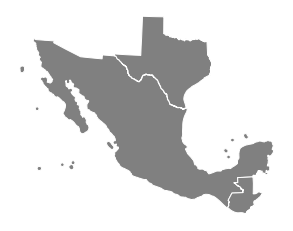

In [20]:
mexico = ox.geocode_to_gdf('Mexico', which_result=1)
print(type(mexico['geometry'].iloc[0]))

# let the geocoder find the first Polygon/MultiPolygon result
mexico = ox.geocode_to_gdf('Mexico', which_result=None)
print(type(mexico['geometry'].iloc[0]))

# instead of a string, you can pass a dict containing a structured query for better precision
mexico = ox.geocode_to_gdf({'country':'Mexico'})
print(type(mexico['geometry'].iloc[0]))

# you can pass multiple queries with mixed types (dicts and strings)
mx_gt_tx = ox.geocode_to_gdf([{'country':'Mexico'},
                              'Guatemala', 
                              {'state':'Texas'}])
mx_gt_tx = ox.project_gdf(mx_gt_tx)
ax = mx_gt_tx.plot(fc='gray', ec='w')
_ = ax.axis('off')

## Get Street networks by place name

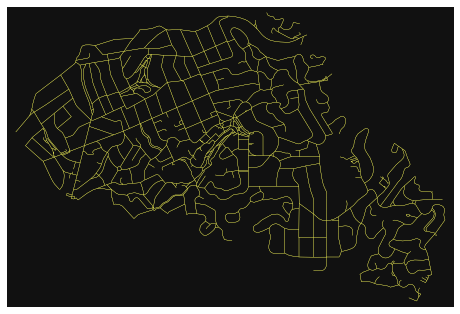

In [21]:
# get the walking network for piedmont
G = ox.graph_from_place('Piedmont, California, USA', network_type='walk')
fig, ax = ox.plot_graph(G, node_size=0, edge_color='#FFFF5C', edge_linewidth=0.25)

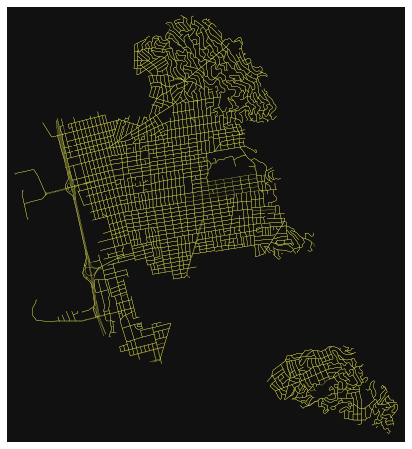

In [24]:
# create a network from multiple places
places = ['Piedmont, California, USA', 
          'Berkeley, California, USA',
          'Emeryville, California, USA']

# use retain_all if you want to keep all disconnected subgraphs (e.g. when your places aren't adjacent)
G = ox.graph_from_place(places, network_type='drive', retain_all=True)
fig, ax = ox.plot_graph(G, node_size=0, edge_color='#FFFF5C', edge_linewidth=0.25)

## ... But now in Vancouver! 

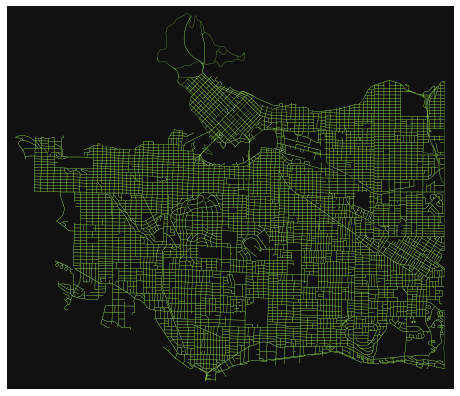

In [25]:
places = [{'city': 'Vancouver',
         'country': 'Canada'}]
G = ox.graph_from_place(places, network_type='drive')
fig, ax = ox.plot_graph(G, node_size=0, edge_color='#AAFF5C', edge_linewidth=0.20)

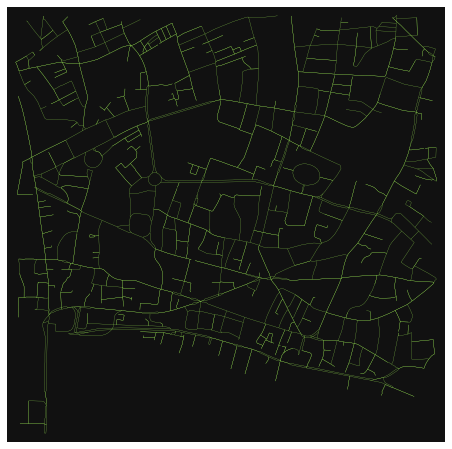

In [27]:
'''
TODO
 - Create 2D grid (bins) of lat/long coordinates for city. 
 - Use google maps api instead. 
'''

query = {'place':'3600',
         'street':'GLEN DRIVE',
         'city':'Vancouver'}
H = ox.graph_from_address(query, network_type='drive')
fig, ax = ox.plot_graph(H, node_size=0, edge_color='#AAFF5C', edge_linewidth=0.20)